In [6]:
import numpy as np
import pandas as pd
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

In [7]:
def unet_one_channel(input_size=(256, 256, 1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 1, activation=LeakyReLU(), padding="same")(inputs)
    conv1 = Conv2D(64, 1, activation=LeakyReLU(), padding="same")(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 1, activation=LeakyReLU(), padding="same")(pool1)
    conv2 = Conv2D(128, 1, activation=LeakyReLU(), padding="same")(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 1, activation=LeakyReLU(), padding="same")(pool2)
    conv3 = Conv2D(256, 1, activation=LeakyReLU(), padding="same")(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 1, activation=LeakyReLU(), padding="same")(pool3)
    conv4 = Conv2D(512, 1, activation=LeakyReLU(), padding="same")(conv4)
    drop4 = Dropout(0.3)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 1, activation=LeakyReLU(), padding="same")(pool4)
    conv5 = Conv2D(1024, 1, activation=LeakyReLU(), padding="same")(conv5)
    drop5 = Dropout(0.3)(conv5)

    up6 = Conv2D(512, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(drop5)
    )
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 1, activation=LeakyReLU(), padding="same")(merge6)
    conv6 = Conv2D(512, 1, activation=LeakyReLU(), padding="same")(conv6)

    up7 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(conv6)
    )
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 1, activation=LeakyReLU(), padding="same")(merge7)
    conv7 = Conv2D(256, 1, activation=LeakyReLU(), padding="same")(conv7)

    up8 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(conv7)
    )
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 1, activation=LeakyReLU(), padding="same")(merge8)
    conv8 = Conv2D(128, 1, activation=LeakyReLU(), padding="same")(conv8)

    up9 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(conv8)
    )
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 1, activation=LeakyReLU(), padding="same")(merge9)
    conv9 = Conv2D(64, 1, activation=LeakyReLU(), padding="same")(conv9)
    conv9 = Conv2D(2, 1, activation=LeakyReLU(), padding="same")(conv9)
    conv10 = Conv2D(1, 1, activation="sigmoid")(conv9)

    model = Model(inputs, conv10)

    model.compile(
        # optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    # model.summary()
    return model

In [ ]:
# Instantiate the model
model = unet_one_channel()

# Plot the model architecture
plot_model(model, to_file='unet_model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('unet_model_plot.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

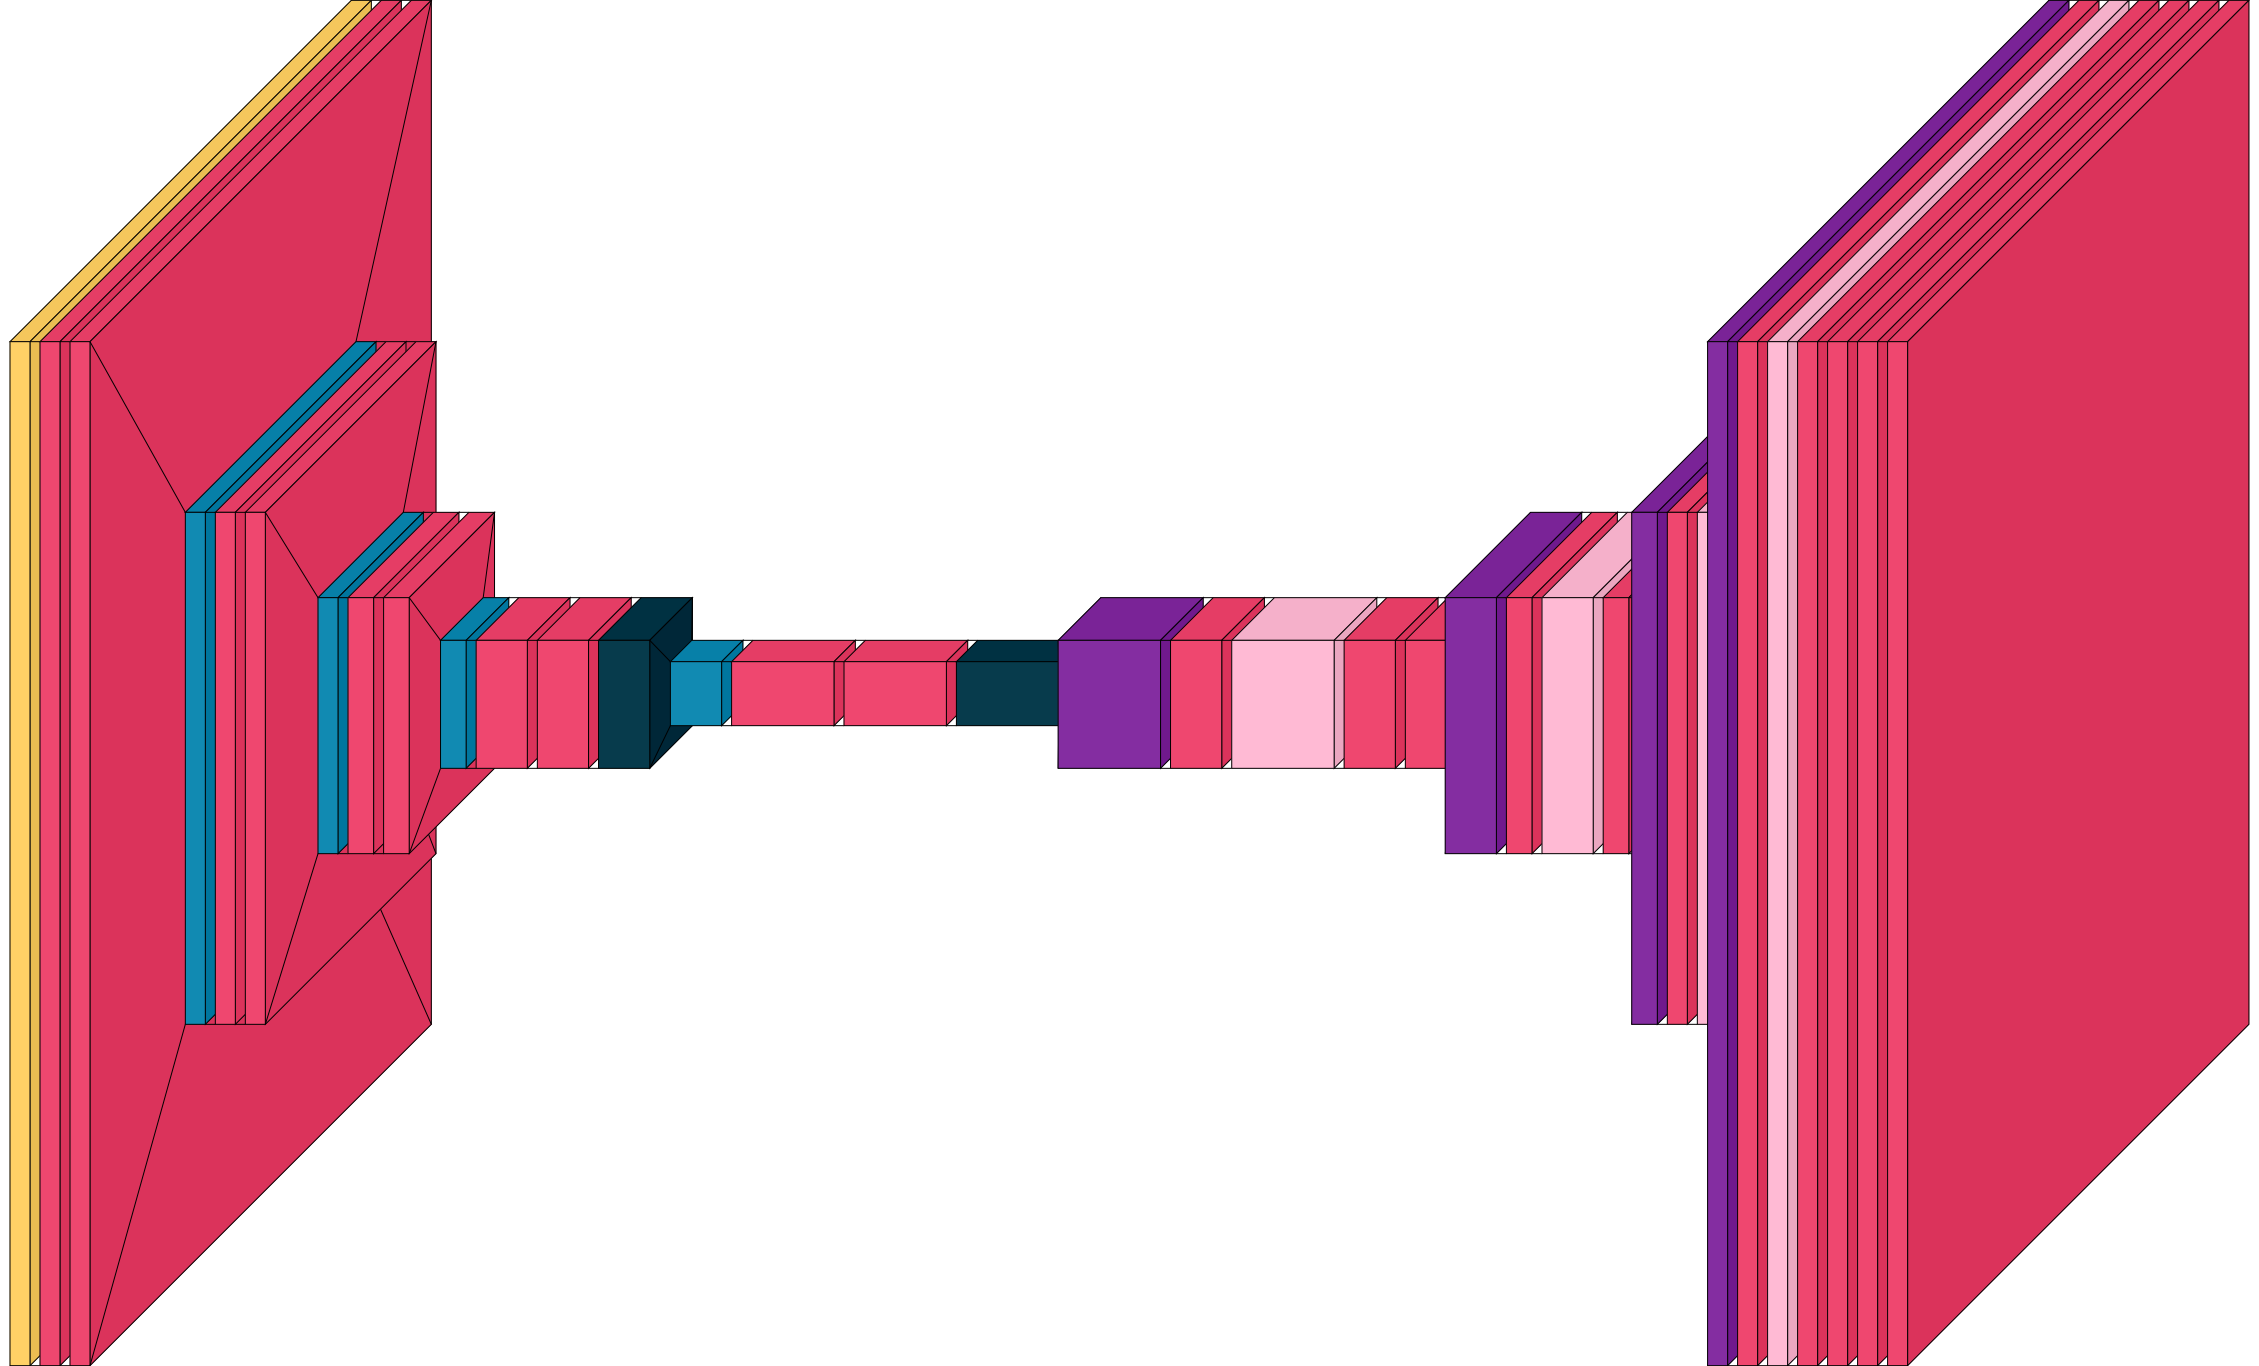

In [10]:
import visualkeras
from PIL import Image

def plot_keras_model(model):
    # Plot model architecture using visualkeras
    img = visualkeras.layered_view(model)
    
    # Display the image
    img.show()

# Instantiate the model
model = unet_one_channel()

# Display the model architecture
plot_keras_model(model)


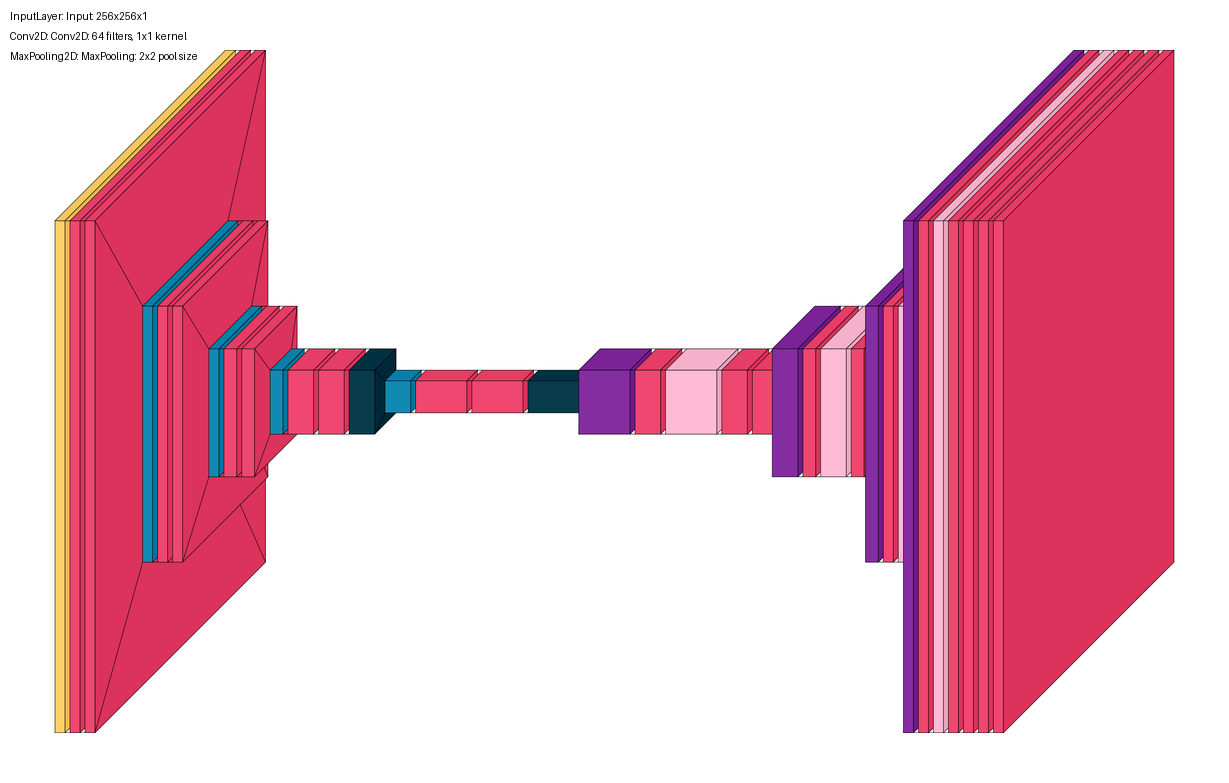

In [13]:
import visualkeras
from PIL import Image, ImageDraw, ImageFont

def plot_keras_model(model, output_file='model_architecture.png'):
    # Generate the model architecture image using visualkeras
    img = visualkeras.layered_view(model)
    
    # Resize the image and add margins
    margin = 50
    new_size = (img.width // 2, img.height // 2)  # Resize to half of the original size
    
    # Resize the image
    img = img.resize(new_size, Image.LANCZOS)
    
    # Create a new image with margin
    bordered_img = Image.new('RGB', (new_size[0] + 2 * margin, new_size[1] + 2 * margin), 'white')
    bordered_img.paste(img, (margin, margin))
    
    # Add text descriptions for each layer
    draw = ImageDraw.Draw(bordered_img)
    font = ImageFont.load_default()
    
    # Get the details of each layer (example layer details, adjust as necessary)
    layer_details = {
        'InputLayer': 'Input: 256x256x1',
        'Conv2D': 'Conv2D: 64 filters, 1x1 kernel',
        'MaxPooling2D': 'MaxPooling: 2x2 pool size',
        # Add other layers and details as needed
    }
    
    # Position text descriptions (adjust positions as needed)
    y_text = 10
    for layer_name, details in layer_details.items():
        draw.text((10, y_text), f"{layer_name}: {details}", fill='black', font=font)
        y_text += 20
    
    # Save and show the image
    bordered_img.save(output_file)
    bordered_img.show()

# Instantiate the model
model = unet_one_channel()

# Display the model architecture with custom modifications
plot_keras_model(model)


In [ ]:
import visualkeras
from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf

def extract_layer_info(model):
    """Extracts detailed information about each layer of the model."""
    layer_info = []
    for layer in model.layers:
        layer_name = layer.name
        layer_type = layer.__class__.__name__
        # Handle InputLayer and other layers consistently
        if isinstance(layer, tf.keras.layers.InputLayer):
            layer_output_shape = layer.input_shape
        else:
            layer_output_shape = layer.output_shape
        layer_params = layer.count_params()
        layer_info.append(f"{layer_name} ({layer_type}): {layer_output_shape}, params: {layer_params}")
    return layer_info

def plot_keras_model(model, output_file='model_architecture.png'):
    # Generate the model architecture image using visualkeras
    img = visualkeras.layered_view(model)
    
    # Resize the image and add margins
    margin = 50
    new_size = (img.width // 2, img.height // 2)  # Resize to half of the original size
    
    # Resize the image
    img = img.resize(new_size, Image.LANCZOS)
    
    # Create a new image with margin
    bordered_img = Image.new('RGB', (new_size[0] + 2 * margin, new_size[1] + 2 * margin), 'white')
    bordered_img.paste(img, (margin, margin))
    
    # Extract layer information
    layer_info = extract_layer_info(model) 
    
    # Add text descriptions for each layer
    draw = ImageDraw.Draw(bordered_img)
    font = ImageFont.load_default()
    
    # Position text descriptions (adjust as necessary)
    y_text = 10
    for info in layer_info:
        draw.text((10, y_text), info, fill='black', font=font)
        y_text += 20
        if y_text > bordered_img.height - 50:  # Check if space is running out
            bordered_img = bordered_img.resize((bordered_img.width, bordered_img.height + 100), Image.LANCZOS)
            draw = ImageDraw.Draw(bordered_img)  # Redraw after resizing
    
    # Save and show the image
    bordered_img.save(output_file)
    bordered_img.show()

# Instantiate the model
model = unet_one_channel()

# Display the model architecture with custom modifications
# plot_keras_model(model)


In [3]:
def unet_two_channel(input_size=(256, 256, 2)):

    inputs = Input(input_size)
    conv1 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(inputs)
    conv1 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(pool1)
    conv2 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(pool2)
    conv3 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 2, activation=LeakyReLU(), padding="same")(pool3)
    conv4 = Conv2D(512, 2, activation=LeakyReLU(), padding="same")(conv4)
    drop4 = Dropout(0.3)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 2, activation=LeakyReLU(), padding="same")(pool4)
    conv5 = Conv2D(1024, 2, activation=LeakyReLU(), padding="same")(conv5)
    drop5 = Dropout(0.3)(conv5)

    up6 = Conv2D(512, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(drop5)
    )
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 2, activation=LeakyReLU(), padding="same")(merge6)
    conv6 = Conv2D(512, 2, activation=LeakyReLU(), padding="same")(conv6)

    up7 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(conv6)
    )
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(merge7)
    conv7 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(conv7)

    up8 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(conv7)
    )
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(merge8)
    conv8 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(conv8)

    up9 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(conv8)
    )
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(merge9)
    conv9 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(conv9)
    conv9 = Conv2D(2, 2, activation=LeakyReLU(), padding="same")(conv9)
    conv10 = Conv2D(1, 1, activation="sigmoid")(conv9)

    model = Model(inputs, conv10)

    model.compile(
        # optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    # model.summary()
    return model

In [4]:
def unet_bitemporal_one_channel(input_size1=(256, 256, 1), input_size2=(256, 256, 1)):

    inputs1 = Input(input_size1)
    conv1 = Conv2D(64, 1, activation=LeakyReLU(), padding="same")(inputs1)
    conv1 = Conv2D(64, 1, activation=LeakyReLU(), padding="same")(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 1, activation=LeakyReLU(), padding="same")(pool1)
    conv2 = Conv2D(128, 1, activation=LeakyReLU(), padding="same")(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 1, activation=LeakyReLU(), padding="same")(pool2)
    conv3 = Conv2D(256, 1, activation=LeakyReLU(), padding="same")(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    # conv4 = Conv2D(512, 1, activation = LeakyReLU() , padding = 'same')(pool3)
    # conv4 = Conv2D(512, 1, activation = LeakyReLU() , padding = 'same')(conv4)
    # drop4 = Dropout(0.7)(conv4)
    # pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    inputs2 = Input(input_size2)
    conv1_2 = Conv2D(64, 1, activation=LeakyReLU(), padding="same")(inputs2)
    conv1_2 = Conv2D(64, 1, activation=LeakyReLU(), padding="same")(conv1_2)
    pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
    conv2_2 = Conv2D(128, 1, activation=LeakyReLU(), padding="same")(pool1_2)
    conv2_2 = Conv2D(128, 1, activation=LeakyReLU(), padding="same")(conv2_2)
    pool2_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
    conv3_2 = Conv2D(256, 1, activation=LeakyReLU(), padding="same")(pool2_2)
    conv3_2 = Conv2D(256, 1, activation=LeakyReLU(), padding="same")(conv3_2)
    pool3_2 = MaxPooling2D(pool_size=(2, 2))(conv3_2)
    # conv4_2 = Conv2D(512, 1, activation = LeakyReLU() , padding = 'same')(pool3_2)
    # conv4_2 = Conv2D(512, 1, activation = LeakyReLU() , padding = 'same')(conv4_2)
    # drop4_2 = Dropout(0.7)(conv4_2)
    # pool4_2 = MaxPooling2D(pool_size=(2, 2))(drop4_2)

    merged = concatenate([pool3, pool3_2])

    conv5 = Conv2D(512, 1, activation=LeakyReLU(), padding="same")(merged)
    conv5 = Conv2D(512, 1, activation=LeakyReLU(), padding="same")(conv5)
    drop5 = Dropout(0.2)(conv5)

    # up6 = Conv2D(512, 1, activation = LeakyReLU() , padding = 'same')(UpSampling2D(size = (2,2))(drop5))
    # merge6 = concatenate([drop4,drop4_2,up6], axis = 3)
    # conv6 = Conv2D(512, 1, activation = LeakyReLU() , padding = 'same')(merge6)
    # conv6 = Conv2D(512, 1, activation = LeakyReLU() , padding = 'same')(conv6)

    up7 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(drop5)
    )
    merge7 = concatenate([conv3, conv3_2, up7], axis=3)
    conv7 = Conv2D(256, 1, activation=LeakyReLU(), padding="same")(merge7)
    conv7 = Conv2D(256, 1, activation=LeakyReLU(), padding="same")(conv7)

    up8 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(conv7)
    )
    merge8 = concatenate([conv2, conv2_2, up8], axis=3)
    conv8 = Conv2D(128, 1, activation=LeakyReLU(), padding="same")(merge8)
    conv8 = Conv2D(128, 1, activation=LeakyReLU(), padding="same")(conv8)

    up9 = Conv2D(
        64,
        2,
        activation=LeakyReLU(),
        padding="same",
    )(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, conv1_2, up9], axis=3)
    conv9 = Conv2D(64, 1, activation=LeakyReLU(), padding="same")(merge9)
    conv9 = Conv2D(64, 1, activation=LeakyReLU(), padding="same")(conv9)
    conv9 = Conv2D(2, 1, activation=LeakyReLU(), padding="same")(conv9)
    conv10 = Conv2D(1, 1, activation="sigmoid")(conv9)

    model = Model([inputs1, inputs2], conv10)

    model.compile(
        # optimizer=tf.keras.optimizers.Adam(lr=1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    # optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
    # Adam(lr = 1e-4)
    # model.summary()

    return model

In [5]:
def unet_bitemporal_two_channel(input_size1=(256, 256, 2), input_size2=(256, 256, 2)):

    inputs1 = Input(input_size1)
    conv1 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(inputs1)
    conv1 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(pool1)
    conv2 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(pool2)
    conv3 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    # conv4 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(pool3)
    # conv4 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(conv4)
    # drop4 = Dropout(0.7)(conv4)
    # pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    inputs2 = Input(input_size2)
    conv1_2 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(inputs2)
    conv1_2 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(conv1_2)
    pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
    conv2_2 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(pool1_2)
    conv2_2 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(conv2_2)
    pool2_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
    conv3_2 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(pool2_2)
    conv3_2 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(conv3_2)
    pool3_2 = MaxPooling2D(pool_size=(2, 2))(conv3_2)
    # conv4_2 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(pool3_2)
    # conv4_2 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(conv4_2)
    # drop4_2 = Dropout(0.7)(conv4_2)
    # pool4_2 = MaxPooling2D(pool_size=(2, 2))(drop4_2)

    merged = concatenate([pool3, pool3_2])

    conv5 = Conv2D(512, 2, activation=LeakyReLU(), padding="same")(merged)
    conv5 = Conv2D(512, 2, activation=LeakyReLU(), padding="same")(conv5)
    drop5 = Dropout(0.2)(conv5)

    # up6 = Conv2D(512, 2, activation = LeakyReLU() , padding = 'same')(UpSampling2D(size = (2,2))(drop5))
    # merge6 = concatenate([drop4,drop4_2,up6], axis = 3)
    # conv6 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(merge6)
    # conv6 = Conv2D(512, 3, activation = LeakyReLU() , padding = 'same')(conv6)

    up7 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(drop5)
    )
    merge7 = concatenate([conv3, conv3_2, up7], axis=3)
    conv7 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(merge7)
    conv7 = Conv2D(256, 2, activation=LeakyReLU(), padding="same")(conv7)

    up8 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(
        UpSampling2D(size=(2, 2))(conv7)
    )
    merge8 = concatenate([conv2, conv2_2, up8], axis=3)
    conv8 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(merge8)
    conv8 = Conv2D(128, 2, activation=LeakyReLU(), padding="same")(conv8)

    up9 = Conv2D(
        64,
        2,
        activation=LeakyReLU(),
        padding="same",
    )(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, conv1_2, up9], axis=3)
    conv9 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(merge9)
    conv9 = Conv2D(64, 2, activation=LeakyReLU(), padding="same")(conv9)
    conv9 = Conv2D(2, 2, activation=LeakyReLU(), padding="same")(conv9)
    conv10 = Conv2D(1, 1, activation="sigmoid")(conv9)

    model = Model([inputs1, inputs2], conv10)

    model.compile(
        # optimizer=tf.keras.optimizers.Adam(lr=1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    # optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
    # Adam(lr = 1e-4)
    # model.summary()
    return model

In [6]:
model1 = unet_one_channel(input_size=(256, 256, 1))
model2 = unet_two_channel(input_size=(256, 256, 2))
model3 = unet_bitemporal_one_channel(
    input_size1=(256, 256, 1), input_size2=(256, 256, 1)
)
model4 = unet_bitemporal_two_channel(
    input_size1=(256, 256, 2), input_size2=(256, 256, 2)
)

In [7]:
model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        128 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      4,160 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      8,320 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │     16,512 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     33,024 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     65,792 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │    131,584 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    262,656 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32, 32,    │          0 │ conv2d_7[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │    525,312 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  1,049,600 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_9[0][0]  

 Total params: 5,929,861 (22.62 MB)

 Trainable params: 5,929,861 (22.62 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 256, 256,  │        576 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 256, 256,  │     16,448 │ conv2d_24[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 128, 128,  │     32,896 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 128, 128,  │     65,664 │ conv2d_26[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 64, 64,    │    131,328 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 64, 64,    │    262,400 │ conv2d_28[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 32, 32,    │          0 │ conv2d_29[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 32, 32,    │    524,800 │ max_pooling2d_6[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 32, 32,    │  1,049,088 │ conv2d_30[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_31[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 16, 16,    │          0 │ dropout_2[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 16, 16,    │  2,098,176 │ max_pooling2d_7[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 16, 16,    │  4,195,328 │ conv2d_32[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_33[0][0] 

 Total params: 15,343,301 (58.53 MB)

 Trainable params: 15,343,301 (58.53 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model3.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 256, 256,  │        128 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 256, 256,  │        128 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 256, 256,  │      4,160 │ conv2d_48[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 256, 256,  │      4,160 │ conv2d_54[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 128, 128,  │          0 │ conv2d_49[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 128, 128,  │          0 │ conv2d_55[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 128, 128,  │      8,320 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 128, 128,  │      8,320 │ max_pooling2d_11… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 128, 128,  │     16,512 │ conv2d_50[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 128, 128,  │     16,512 │ conv2d_56[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ conv2d_51[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 64, 64,    │          0 │ conv2d_57[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 64, 64,    │     33,024 │ max_pooling2d_9[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 64, 64,    │     33,024 │ max_pooling2d_12… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 64, 64,    │     65,792 │ conv2d_52[0][0] 

 Total params: 1,814,853 (6.92 MB)

 Trainable params: 1,814,853 (6.92 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model4.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_73 (Conv2D)  │ (None, 256, 256,  │        576 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_79 (Conv2D)  │ (None, 256, 256,  │        576 │ input_layer_5[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_74 (Conv2D)  │ (None, 256, 256,  │     16,448 │ conv2d_73[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_80 (Conv2D)  │ (None, 256, 256,  │     16,448 │ conv2d_79[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 128, 128,  │          0 │ conv2d_74[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 128, 128,  │          0 │ conv2d_80[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_75 (Conv2D)  │ (None, 128, 128,  │     32,896 │ max_pooling2d_14… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_81 (Conv2D)  │ (None, 128, 128,  │     32,896 │ max_pooling2d_17… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_76 (Conv2D)  │ (None, 128, 128,  │     65,664 │ conv2d_75[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 128, 128,  │     65,664 │ conv2d_81[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 64, 64,    │          0 │ conv2d_76[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 64, 64,    │          0 │ conv2d_82[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_77 (Conv2D)  │ (None, 64, 64,    │    131,328 │ max_pooling2d_15… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 64, 64,    │    131,328 │ max_pooling2d_18… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_78 (Conv2D)  │ (None, 64, 64,    │    262,400 │ conv2d_77[0][0] 

 Total params: 5,183,045 (19.77 MB)

 Trainable params: 5,183,045 (19.77 MB)

 Non-trainable params: 0 (0.00 B)